<a href="https://colab.research.google.com/github/asyraffatha/Task-MachineLearning/blob/main/Week%208%20UTS/UTS_Regression_Model_Asyraff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install library
!pip install xgboost seaborn --quiet

In [ ]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load dataset
file_path = '/content/drive/MyDrive/Regression Model/RegresiUTSTelkom.csv'
df = pd.read_csv(file_path)
print("Shape of dataset:", df.shape)
print("Nama kolom dalam dataset:", df.columns)

Shape of dataset: (515344, 91)
Nama kolom dalam dataset: Index(['2001', '49.94357', '21.47114', '73.0775', '8.74861', '-17.40628',
       '-13.09905', '-25.01202', '-12.23257', '7.83089', '-2.46783', '3.32136',
       '-2.31521', '10.20556', '611.10913', '951.0896', '698.11428',
       '408.98485', '383.70912', '326.51512', '238.11327', '251.42414',
       '187.17351', '100.42652', '179.19498', '-8.41558', '-317.87038',
       '95.86266', '48.10259', '-95.66303', '-18.06215', '1.96984', '34.42438',
       '11.7267', '1.3679', '7.79444', '-0.36994', '-133.67852', '-83.26165',
       '-37.29765', '73.04667', '-37.36684', '-3.13853', '-24.21531',
       '-13.23066', '15.93809', '-18.60478', '82.15479', '240.5798',
       '-10.29407', '31.58431', '-25.38187', '-3.90772', '13.29258', '41.5506',
       '-7.26272', '-21.00863', '105.50848', '64.29856', '26.08481',
       '-44.5911', '-8.30657', '7.93706', '-10.7366', '-95.44766', '-82.03307',
       '-35.59194', '4.69525', '70.95626', '28.091

In [ ]:
# Cek ukuran dataset
print(f"Ukuran dataset: {df.shape}")
print(df.head())

Ukuran dataset: (51534, 91)
        Feature_0  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  \
201297       2008   44.09533    3.25213    6.47710   17.69897  -23.67294   
75576        1993   38.90385   -8.67212   31.33171   -7.99900    0.46314   
46834        2006   49.15728   27.23024   31.62364    1.06704  -22.84770   
481423       1992   36.45757  -57.98751   55.21720    6.74121  -38.01408   
90320        1998   42.94000   20.84997   28.13751   -3.64397   16.60444   

        Feature_6  Feature_7  Feature_8  Feature_9  ...  Feature_81  \
201297  -21.82566   15.18481   -0.77401    9.02418  ...     4.48519   
75576    -2.96364  -27.22097   -1.84019   11.14816  ...    20.84320   
46834   -11.96281   11.30337    5.49682    7.02751  ...     4.38046   
481423   -8.91355   13.01662    1.44185    2.08769  ...    15.49053   
90320    -0.39047  -23.82962   -1.82006   -3.71131  ...    -5.14548   

        Feature_82  Feature_83  Feature_84  Feature_85  Feature_86  \
201297  -119.21003

In [ ]:
# Sampling jika dataset besar (misalnya ambil 10%)
if len(df) > 10000:
    df = df.sample(frac=0.1, random_state=42)
    print(f"Dataset setelah sampling: {df.shape}")

Dataset setelah sampling: (5153, 91)


In [ ]:
# Eksplorasi dataset
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 5153 entries, 457153 to 35813
Data columns (total 91 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Feature_0   5153 non-null   int64  
 1   Feature_1   5153 non-null   float64
 2   Feature_2   5153 non-null   float64
 3   Feature_3   5153 non-null   float64
 4   Feature_4   5153 non-null   float64
 5   Feature_5   5153 non-null   float64
 6   Feature_6   5153 non-null   float64
 7   Feature_7   5153 non-null   float64
 8   Feature_8   5153 non-null   float64
 9   Feature_9   5153 non-null   float64
 10  Feature_10  5153 non-null   float64
 11  Feature_11  5153 non-null   float64
 12  Feature_12  5153 non-null   float64
 13  Feature_13  5153 non-null   float64
 14  Feature_14  5153 non-null   float64
 15  Feature_15  5153 non-null   float64
 16  Feature_16  5153 non-null   float64
 17  Feature_17  5153 non-null   float64
 18  Feature_18  5153 non-null   float64
 19  Feature_19  5153 non-null 

,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_81,Feature_82,Feature_83,Feature_84,Feature_85,Feature_86,Feature_87,Feature_88,Feature_89,Feature_90
count,5153.000000,5153.000000,5153.000000,5153.000000,5153.000000,5153.000000,5153.000000,5153.000000,5153.000000,5153.000000,...,5153.000000,5153.000000,5153.000000,5153.000000,5153.000000,5153.000000,5153.000000,5153.000000,5153.000000,5153.000000
mean,1998.571318,43.383638,1.430356,9.229997,1.191128,-6.592069,-9.556075,-2.420011,-1.692294,3.691394,...,15.865433,-71.235336,42.280682,39.035256,0.158331,16.658187,-23.894293,4.632470,18.919796,1.423966
std,10.749784,6.163282,53.135249,35.241432,16.211548,23.232152,12.933941,14.404454,8.068798,10.718976,...,33.923990,173.480115,121.771393,97.183067,16.212336,112.592055,177.468392,13.221556,184.512217,22.415308
min,1926.000000,12.993500,-299.235000,-195.315000,-104.551230,-158.917880,-70.872270,-69.587900,-55.461240,-90.613000,...,-145.558680,-2358.734730,-789.857860,-653.363780,-129.461380,-1228.452080,-2492.187860,-74.956200,-1440.684230,-131.422040
25%,1994.000000,39.871600,-26.215180,-10.518180,-8.277460,-20.830470,-18.458970,-10.666050,-6.351940,-2.333220,...,-1.932270,-140.464820,-21.852130,-3.246760,-7.038960,-31.391350,-100.424130,-2.503850,-59.317300,-8.846460
50%,2002.000000,44.332680,8.528090,10.835960,-0.445230,-5.869390,-11.146320,-1.947830,-1.611570,3.959070,...,9.111480,-51.432800,30.688580,34.124570,0.675540,14.466670,-17.757960,3.270320,7.069010,0.230580
75%,2006.000000,47.852930,37.130310,29.360940,8.654820,8.251650,-2.417140,6.455140,3.045210,9.881500,...,26.303760,15.234960,93.038220,77.559650,8.488590,65.501910,53.539590,10.230360,84.758860,9.670540
max,2010.000000,58.241230,234.425770,268.376010,88.140520,120.757300,77.048470,97.801420,57.682080,82.163430,...,508.310350,1112.343630,1522.245140,1245.358170,114.818820,1260.509840,1692.181950,96.586730,2043.369580,208.990590


In [ ]:
print(df.columns)


Index(['Feature_0', 'Feature_1', 'Feature_2', 'Feature_3', 'Feature_4',
       'Feature_5', 'Feature_6', 'Feature_7', 'Feature_8', 'Feature_9',
       'Feature_10', 'Feature_11', 'Feature_12', 'Feature_13', 'Feature_14',
       'Feature_15', 'Feature_16', 'Feature_17', 'Feature_18', 'Feature_19',
       'Feature_20', 'Feature_21', 'Feature_22', 'Feature_23', 'Feature_24',
       'Feature_25', 'Feature_26', 'Feature_27', 'Feature_28', 'Feature_29',
       'Feature_30', 'Feature_31', 'Feature_32', 'Feature_33', 'Feature_34',
       'Feature_35', 'Feature_36', 'Feature_37', 'Feature_38', 'Feature_39',
       'Feature_40', 'Feature_41', 'Feature_42', 'Feature_43', 'Feature_44',
       'Feature_45', 'Feature_46', 'Feature_47', 'Feature_48', 'Feature_49',
       'Feature_50', 'Feature_51', 'Feature_52', 'Feature_53', 'Feature_54',
       'Feature_55', 'Feature_56', 'Feature_57', 'Feature_58', 'Feature_59',
       'Feature_60', 'Feature_61', 'Feature_62', 'Feature_63', 'Feature_64',
       'F

In [ ]:
print(df.head())


        2001  49.94357  21.47114   73.0775   8.74861  -17.40628  -13.09905  \
201297  2008  44.09533   3.25213   6.47710  17.69897  -23.67294  -21.82566   
75576   1993  38.90385  -8.67212  31.33171  -7.99900    0.46314   -2.96364   
46834   2006  49.15728  27.23024  31.62364   1.06704  -22.84770  -11.96281   
481423  1992  36.45757 -57.98751  55.21720   6.74121  -38.01408   -8.91355   
90320   1998  42.94000  20.84997  28.13751  -3.64397   16.60444   -0.39047   

        -25.01202  -12.23257   7.83089  ...   13.0162  -54.40548   58.99367  \
201297   15.18481   -0.77401   9.02418  ...   4.48519 -119.21003 -233.02599   
75576   -27.22097   -1.84019  11.14816  ...  20.84320 -198.24050  270.72953   
46834    11.30337    5.49682   7.02751  ...   4.38046  -32.79098  -12.28873   
481423   13.01662    1.44185   2.08769  ...  15.49053 -276.88177  196.96765   
90320   -23.82962   -1.82006  -3.71131  ...  -5.14548  -67.79813   95.24916   

         15.37344   1.11144  -23.08793   68.40795  -1.82

In [ ]:
df.columns = [f"Feature_{i}" for i in range(df.shape[1])]
print(df.columns)


Index(['Feature_0', 'Feature_1', 'Feature_2', 'Feature_3', 'Feature_4',
       'Feature_5', 'Feature_6', 'Feature_7', 'Feature_8', 'Feature_9',
       'Feature_10', 'Feature_11', 'Feature_12', 'Feature_13', 'Feature_14',
       'Feature_15', 'Feature_16', 'Feature_17', 'Feature_18', 'Feature_19',
       'Feature_20', 'Feature_21', 'Feature_22', 'Feature_23', 'Feature_24',
       'Feature_25', 'Feature_26', 'Feature_27', 'Feature_28', 'Feature_29',
       'Feature_30', 'Feature_31', 'Feature_32', 'Feature_33', 'Feature_34',
       'Feature_35', 'Feature_36', 'Feature_37', 'Feature_38', 'Feature_39',
       'Feature_40', 'Feature_41', 'Feature_42', 'Feature_43', 'Feature_44',
       'Feature_45', 'Feature_46', 'Feature_47', 'Feature_48', 'Feature_49',
       'Feature_50', 'Feature_51', 'Feature_52', 'Feature_53', 'Feature_54',
       'Feature_55', 'Feature_56', 'Feature_57', 'Feature_58', 'Feature_59',
       'Feature_60', 'Feature_61', 'Feature_62', 'Feature_63', 'Feature_64',
       'F

Eksplorasi dan Visualisasi Data

<class 'pandas.core.frame.DataFrame'>
Index: 5153 entries, 457153 to 35813
Data columns (total 91 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Feature_0   5153 non-null   int64  
 1   Feature_1   5153 non-null   float64
 2   Feature_2   5153 non-null   float64
 3   Feature_3   5153 non-null   float64
 4   Feature_4   5153 non-null   float64
 5   Feature_5   5153 non-null   float64
 6   Feature_6   5153 non-null   float64
 7   Feature_7   5153 non-null   float64
 8   Feature_8   5153 non-null   float64
 9   Feature_9   5153 non-null   float64
 10  Feature_10  5153 non-null   float64
 11  Feature_11  5153 non-null   float64
 12  Feature_12  5153 non-null   float64
 13  Feature_13  5153 non-null   float64
 14  Feature_14  5153 non-null   float64
 15  Feature_15  5153 non-null   float64
 16  Feature_16  5153 non-null   float64
 17  Feature_17  5153 non-null   float64
 18  Feature_18  5153 non-null   float64
 19  Feature_19  5153 non-null 

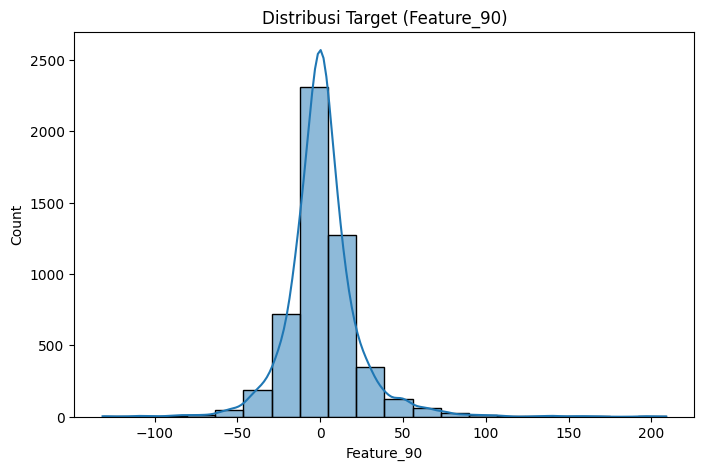

In [ ]:
# Cek tipe data dan missing values
print(df.info())
print(df.isnull().sum())

# Visualisasi target jika dataset memiliki kolom target
target_column = df.columns[-1]  # Ganti sesuai nama kolom target di dataset Anda
if target_column in df.columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[target_column], kde=True, bins=20)
    plt.title(f"Distribusi Target ({target_column})")
    plt.show()


In [ ]:
# Anggap kolom terakhir adalah target
target_column = df.columns[-1]
X = df.iloc[:, :-1]  # Semua kolom kecuali kolom terakhir
y = df[target_column]  # Kolom terakhir

print("Fitur (X):")
print(X.head())
print("\nTarget (y):")
print(y.head())


Fitur (X):
        Feature_0  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  \
201297       2008   44.09533    3.25213    6.47710   17.69897  -23.67294   
75576        1993   38.90385   -8.67212   31.33171   -7.99900    0.46314   
46834        2006   49.15728   27.23024   31.62364    1.06704  -22.84770   
481423       1992   36.45757  -57.98751   55.21720    6.74121  -38.01408   
90320        1998   42.94000   20.84997   28.13751   -3.64397   16.60444   

        Feature_6  Feature_7  Feature_8  Feature_9  ...  Feature_80  \
201297  -21.82566   15.18481   -0.77401    9.02418  ...   -21.88258   
75576    -2.96364  -27.22097   -1.84019   11.14816  ...   126.07325   
46834   -11.96281   11.30337    5.49682    7.02751  ...    18.46901   
481423   -8.91355   13.01662    1.44185    2.08769  ...    19.86491   
90320    -0.39047  -23.82962   -1.82006   -3.71131  ...   101.59806   

        Feature_81  Feature_82  Feature_83  Feature_84  Feature_85  \
201297     4.48519  -119.21003  -23

Statistik Deskriptif:
          Feature_0     Feature_1     Feature_2     Feature_3     Feature_4  \
count  51534.000000  51534.000000  51534.000000  51534.000000  51534.000000   
mean    1998.463286     43.381234      1.116871      8.630126      1.153814   
std       10.841441      6.096472     51.990030     35.316084     16.230094   
min     1922.000000      4.836880   -305.422000   -245.390230   -119.573670   
25%     1994.000000     39.941252    -26.215203    -11.522355     -8.466527   
50%     2002.000000     44.264790      8.598380     10.463270     -0.654040   
75%     2006.000000     47.866132     36.043190     29.765515      8.748738   
max     2010.000000     61.138540    303.977370    322.851430    122.987250   

          Feature_5     Feature_6     Feature_7     Feature_8     Feature_9  \
count  51534.000000  51534.000000  51534.000000  51534.000000  51534.000000   
mean      -6.456766     -9.471798     -2.367160     -1.767880      3.650041   
std       22.919380     12.82

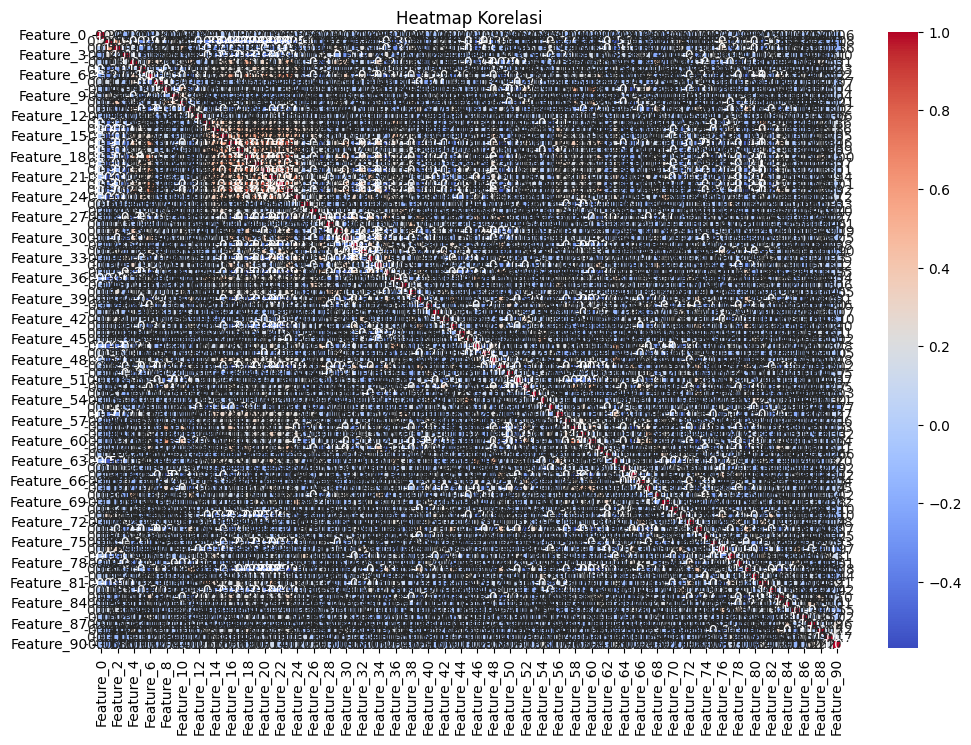

In [ ]:
# Statistik deskriptif
print("Statistik Deskriptif:")
print(df.describe())

# Heatmap korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Heatmap Korelasi")
plt.show()


In [ ]:
# Pisahkan fitur dan target
target_column = df.columns[-1]  # Sesuaikan dengan kolom target Anda
features = [col for col in df.columns if col != target_column]

X = df[features]
y = df[target_column]

# Split data menjadi train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Polynomial Regression:
Mean Squared Error: 117130.80444591142
R-squared: -231.8934665078873


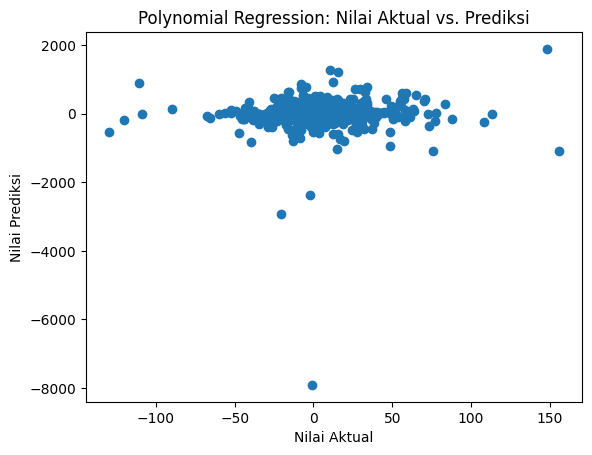

In [ ]:
# Pipeline untuk Polynomial Regression
polynomial_regression_pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),  # Anda dapat menyesuaikan derajat polinomial
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# Latih model
polynomial_regression_pipeline.fit(X_train, y_train)

# Prediksi pada data uji
y_pred_poly = polynomial_regression_pipeline.predict(X_test)

# Evaluasi model
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print("Polynomial Regression:")
print(f"Mean Squared Error: {mse_poly}")
print(f"R-squared: {r2_poly}")

# Visualisasikan hasil prediksi (opsional)
plt.scatter(y_test, y_pred_poly)
plt.xlabel("Nilai Aktual")
plt.ylabel("Nilai Prediksi")
plt.title("Polynomial Regression: Nilai Aktual vs. Prediksi")
plt.show()

Kesimpulan dari Hasil
- MSE Tinggi: Model menghasilkan prediksi yang jauh dari nilai aktual.
- R² Negatif: Model tidak memprediksi dengan baik; performanya jauh lebih buruk daripada model sederhana yang hanya menggunakan rata-rata target.

Decision Tree Regression:
Mean Squared Error: 530.9366231246304
R-squared: -0.05567165905179694


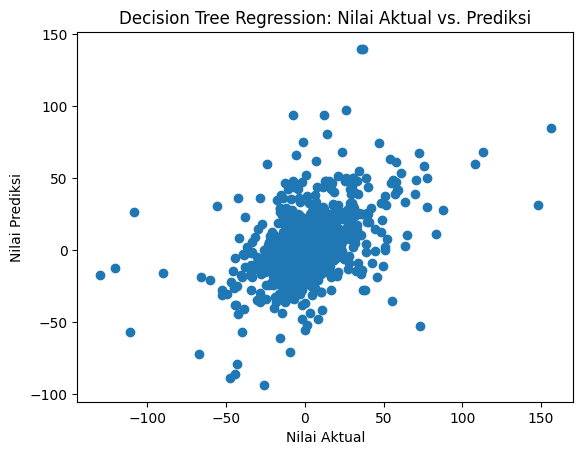

In [ ]:
# Pipeline untuk Decision Tree Regression
decision_tree_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scaling data jika diperlukan
    ('regressor', DecisionTreeRegressor(random_state=42))  # Model Decision Tree
])

# Latih model Decision Tree
decision_tree_pipeline.fit(X_train, y_train)

# Prediksi pada data uji
y_pred_tree = decision_tree_pipeline.predict(X_test)

# Evaluasi model
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print("Decision Tree Regression:")
print(f"Mean Squared Error: {mse_tree}")
print(f"R-squared: {r2_tree}")

# Visualisasikan hasil prediksi (opsional)
plt.scatter(y_test, y_pred_tree)
plt.xlabel("Nilai Aktual")
plt.ylabel("Nilai Prediksi")
plt.title("Decision Tree Regression: Nilai Aktual vs. Prediksi")
plt.show()

Kesimpulan dari Hasil
- MSE Rendah: Model menghasilkan prediksi yang lebih baik dibandingkan Polynomial Regression sebelumnya.
- R² Negatif: Meski MSE lebih rendah, model masih belum memberikan hasil yang signifikan. Performanya hanya sedikit lebih buruk daripada memprediksi nilai rata-rata.

K-Nearest Neighbors Regression:
Mean Squared Error: 378.16517159382636
R-squared: 0.24808680225784518


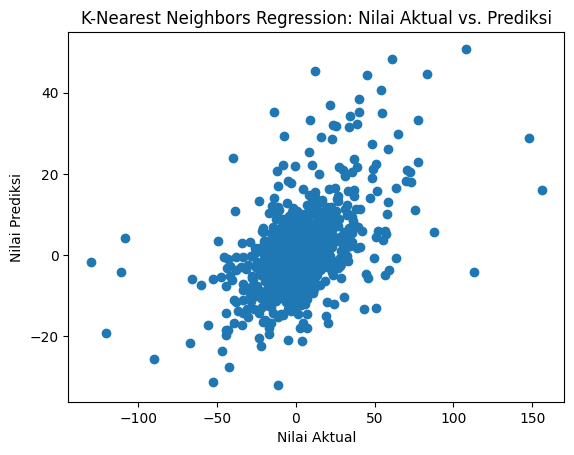

In [ ]:
# Pipeline untuk K-Nearest Neighbors Regression
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scaling data
    ('regressor', KNeighborsRegressor(n_neighbors=5))  # Model KNN
])

# Latih model KNN
knn_pipeline.fit(X_train, y_train)

# Prediksi pada data uji
y_pred_knn = knn_pipeline.predict(X_test)

# Evaluasi model
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print("K-Nearest Neighbors Regression:")
print(f"Mean Squared Error: {mse_knn}")
print(f"R-squared: {r2_knn}")

# Visualisasikan hasil prediksi (opsional)
plt.scatter(y_test, y_pred_knn)
plt.xlabel("Nilai Aktual")
plt.ylabel("Nilai Prediksi")
plt.title("K-Nearest Neighbors Regression: Nilai Aktual vs. Prediksi")
plt.show()

XGBoost Regression:
Mean Squared Error: 230.02021557207817
R-squared: 0.5426463121730678


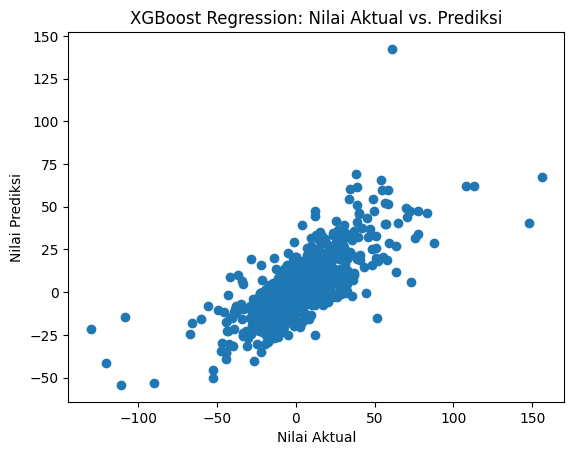

In [ ]:
# Pipeline untuk XGBoost Regression
xgboost_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scaling data jika diperlukan
    ('regressor', XGBRegressor(random_state=42))  # Model XGBoost
])

# Latih model XGBoost
xgboost_pipeline.fit(X_train, y_train)

# Prediksi pada data uji
y_pred_xgb = xgboost_pipeline.predict(X_test)

# Evaluasi model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost Regression:")
print(f"Mean Squared Error: {mse_xgb}")
print(f"R-squared: {r2_xgb}")

# Visualisasikan hasil prediksi (opsional)
plt.scatter(y_test, y_pred_xgb)
plt.xlabel("Nilai Aktual")
plt.ylabel("Nilai Prediksi")
plt.title("XGBoost Regression: Nilai Aktual vs. Prediksi")
plt.show()

Kesimpulan dari Hasil
- MSE Paling Rendah Sejauh Ini:
KNN Regression memberikan prediksi yang lebih baik dibandingkan Polynomial dan Decision Tree.
- R² Positif:
Model ini mampu menjelaskan sebagian hubungan antara input dan target.
- Masih Ada Ruang Perbaikan:
Meskipun hasilnya lebih baik, model belum optimal karena R² masih jauh dari 1.


In [ ]:
from sklearn.model_selection import GridSearchCV

# Contoh tuning untuk Decision Tree
param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best MSE: {-grid_search.best_score_}")


Best parameters: {'max_depth': 5, 'min_samples_split': 5}
Best MSE: 400.4670929570525
